In [232]:
## Excercise 3 | Part 2: Neural Networks

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from scipy.io import loadmat

In [233]:
## Setup the parameters you will use for this part of the exercise
input_layer_size = 400  # 20x20 Input Images of Digit
num_labels = 10         # 10 labels, from 1 to 10
                        # (note that we have mapped "0" to label 10)

In [234]:
## Part 1: Loading and Visualizing Data
#  We start the exercise by first loading and visualizing the dataset. 
#  You will be working with a dataset that contains handwritten digits.
#

def displayData(X, example_width=None):    
    # Set exampl_width automatically if not passed in
    if not example_width:
        example_width = int(np.round(np.sqrt(np.size(X, 1))))
    
    if X.ndim == 1:
        X = np.reshape(X, (1, -1))
    
    # Gray Image
    plt.set_cmap('gray')
    
    # Compute rows, cols
    m, n = np.shape(X)
    example_height = int(n / example_width)
    
    # Compute number of items to display
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))
    
    # Between images padding
    pad = 1
    
    # Setup blank display
    display_array = -np.ones((pad + display_rows * (example_height + pad), 
                              pad + display_cols * (example_width + pad)))
    
    # Copy each example into a patch on the display array
    curr_ex = 0
    for j in range(display_rows):
        for i in range(display_cols):
            if curr_ex > (m - 1):
                break
            # Copy the patch
            
            # Get the max value of the patch
            max_val = np.max(abs(X[curr_ex]))
            
            r = pad + j * (example_height + pad)
            c = pad + i * (example_width + pad)
            
            display_array[r:r+example_height, c:c+example_width] = np.reshape(
                X[curr_ex], (example_height, example_width), 
                order='F') / max_val
            
            curr_ex += 1
        if curr_ex > (m - 1):
            break
    
    # Display Image
    h = plt.imshow(display_array)
    
    # Do not show axis
    plt.axis('off')
    
    return h, display_array

Loading and Visualizing Data ...


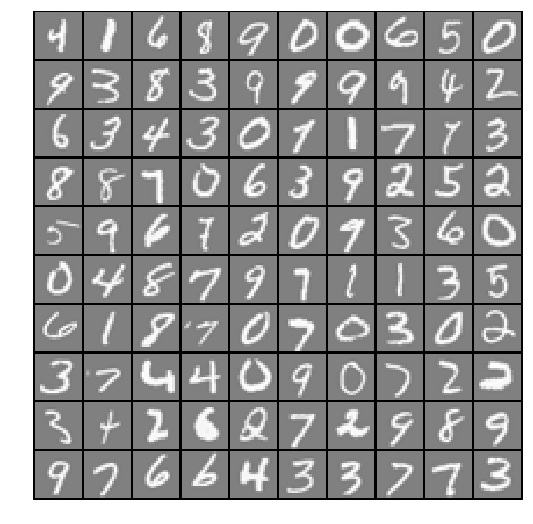

In [235]:
# Load Training Data
print('Loading and Visualizing Data ...')

data = loadmat('../ex3/ex3data1.mat')
X = data['X']
y = data['y'].ravel()
m = np.size(X, 0)

# Randomly select 100 data points to display
sel = np.random.permutation(m)
sel = sel[:100]

plt.figure(figsize=(9, 9))
displayData(X[sel])
None

In [236]:
## Part 2: Loading Parameters
#  In this part of the exercise, we load some pre-initalized
#  neural network parameters.

print('\nLoading Saved Neural Network Parameters ...')

# Load the weights into variabels Theta1 and Theta2
data = loadmat('../ex3/ex3weights.mat')
Theta1 = data['Theta1']
Theta2 = data['Theta2']


Loading Saved Neural Network Parameters ...


In [237]:
def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g

def predict(Theta1, Theta2, X):
    if X.ndim == 1:
        X = np.reshape(X, (1, -1))
    
    m = np.size(X, 0)
    num_labels = np.size(Theta2, 0)
    
    z1 = np.dot(np.c_[np.ones(m), X], Theta1.T)
    a1 = sigmoid(z1)

    z2 = np.dot(np.c_[np.ones(m), a1], Theta2.T)
    h = sigmoid(z2)
    
    p = np.argmax(h, axis=-1)
    
    if np.size(p) == 1:
        p = np.asscalar(p)
    
    return p + 1


Training Set Accuracy 97.5



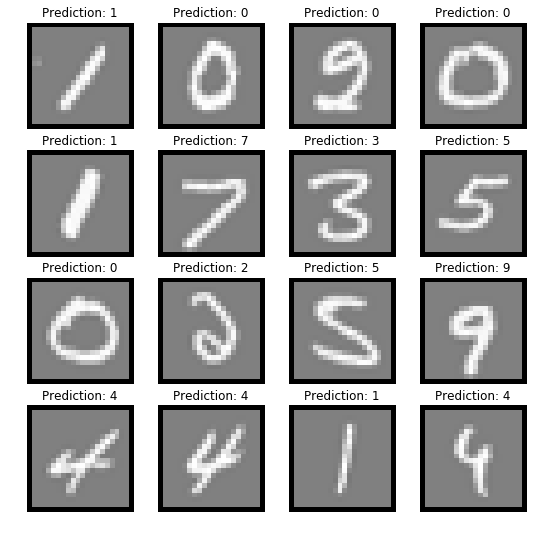

In [238]:
## Part 3: Implement Predict
#  After training the neural network, we would like to use it to predict
#  the labels. You will now implement the "predict" function to use the
#  neural network to predict the labels of the training set. This lets
#  you compute the training set accuracy.

pred = predict(Theta1, Theta2, X)

print('\nTraining Set Accuracy {:.1f}\n'.format(np.mean(pred == y) * 100))

#  To give you an idea of the network's output, you can also run
#  through the examples one at the a time to see what it is predicting.

#  Randomly permute examples
rp = np.random.permutation(m)

fig = plt.figure(figsize=(9, 9))
for i in range(16):
    # Display Image
    fig.add_subplot(4, 4, i + 1)
    displayData(X[rp[i]])
    
    pred = predict(Theta1, Theta2, X[rp[i]])
    plt.title('Prediction: {:d}'.format(np.mod(pred, num_labels)))